In [3]:
from env import VanillaEnv
import numpy as np
import matplotlib.pyplot as plt
import os
import random


Done! Episode Reward:  6.472549019607843
(3, 64, 64)


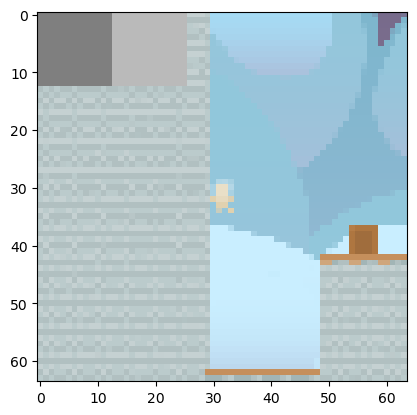

In [4]:
env =  VanillaEnv(start_level=1, num_levels=3)
state = env.reset()
done = False
rewards = []
frames_arr = []
env.seed(1)
np.random.seed(1)
while not done:
    action = np.random.randint(low=0, high=15)
    next_state, r, done, info = env.step(action)
    rewards.append(r)
    frames_arr.append(state)
    state = next_state
    if done: 
        print("Done! Episode Reward: ", np.sum(rewards))
        print(frames_arr[0].shape)
        plt.imshow(np.moveaxis(frames_arr[5], 0, -1), vmin=0., vmax=1.)
        break

In [5]:
env =  VanillaEnv(start_level=1, num_levels=3, render_mode="human")

In [6]:

state = env.reset()
done = False
rewards = []
frames_arr = []
env.seed(1)
np.random.seed(1)
for _ in range(20):
    action = 8
    next_state, r, done, info = env.step(action)
    print(r)
    rewards.append(r)
    frames_arr.append(state)
    state = next_state
    if done: 
        print("Done! Episode Reward: ", np.sum(rewards))
        print(frames_arr[0].shape)
        plt.imshow(np.moveaxis(frames_arr[5], 0, -1), vmin=0., vmax=1.)
        break
    

-0.08000000000000002
-0.0776470588235294
-0.07529411764705883
-0.07372549019607844
-0.07137254901960784
-0.06901960784313727
-0.06666666666666668
-0.06509803921568627
-0.06274509803921569
-0.061176470588235304
-0.059607843137254916
-0.05725490196078431
-0.05568627450980393
-0.05411764705882354
-0.05254901960784313
-0.050980392156862744
-0.07529411764705883
-0.10039215686274511
-0.09803921568627452
-0.09803921568627452
